# Projet ML
GAUD - CURRAL - GALMIER

## Libraries

### Installation

In [1]:
! pip install tensorflow

### Import

In [2]:
import numpy as np
import tensorflow as tf
from glob import glob
from tensorflow import audio

import numpy as np
# import required modules 
import os
import matplotlib.pyplot as plt

### Variables

In [3]:
TEST_DATA_PATH          = 'Data\\test'
TRAIN_DATA_PATH         = 'Data\\train'
VAL_DATA_PATH           = 'Data\\val'

# Code

In [4]:
from os import listdir

birds = list(listdir(TRAIN_DATA_PATH))
print(birds)

['Asian Koel', 'Black Kite', 'Black-breasted Parrotbill', 'Black-necked crane', 'Bristled Grassbird', 'Cheer Pheasant', 'Common Cuckoo', 'Common Pochard', 'Common Wood Pigeon', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Great Slaty Woodpecker', 'Greater Spotted Eagle', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-sided Thrush', 'Himalayan Monal', 'House Crow', 'House Sparrow', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Long-tailed Duck', 'Pallas_s Fish Eagle', 'Red-billed Blue Magpie', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-necked Hornbill', 'Rustic Bunting', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Slender-billed Babbler', 'Spiny Babbler', 'Spotted Dove', 'Steppe Eagle', 'Swamp Francolin', 'Swamp Grass-babbler', 'White-throated Bushchat', 'Wood Snipe']


In [5]:
fileLabeled = {}

for folderName in birds:
    PATH_TO_FOLDER = os.path.join(TEST_DATA_PATH, folderName)

    filesInFolder = listdir(PATH_TO_FOLDER)
    
    for fileNameWav in filesInFolder:
        splitName = fileNameWav.split('.')
        fileLabeled[splitName[0]] = folderName
        
print(fileLabeled)

{'XC161198 1': 'Asian Koel', 'XC162828 0': 'Asian Koel', 'XC179229 8': 'Asian Koel', 'XC182810 0': 'Asian Koel', 'XC196583 0': 'Asian Koel', 'XC196584 1': 'Asian Koel', 'XC236515 1': 'Asian Koel', 'XC311271 0': 'Asian Koel', 'XC314339 1': 'Asian Koel', 'XC327430 1': 'Asian Koel', 'XC327430 2': 'Asian Koel', 'XC332698 1': 'Asian Koel', 'XC359129 0': 'Asian Koel', 'XC365421 0': 'Asian Koel', 'XC369205 0': 'Asian Koel', 'XC369205 2': 'Asian Koel', 'XC412822 1': 'Asian Koel', 'XC416848 original': 'Asian Koel', 'XC426536 7': 'Asian Koel', 'XC446387 10': 'Asian Koel', 'XC454504 0': 'Asian Koel', 'XC461162 0': 'Asian Koel', 'XC461634 original': 'Asian Koel', 'XC531612 1': 'Asian Koel', 'XC576721 8': 'Asian Koel', 'XC578005 original': 'Asian Koel', 'XC591315 3': 'Asian Koel', 'XC591315 5': 'Asian Koel', 'XC594949 1': 'Asian Koel', 'XC594949 23': 'Asian Koel', 'XC594949 4': 'Asian Koel', 'XC594949 42': 'Asian Koel', 'XC594949 43': 'Asian Koel', 'XC594951 0': 'Asian Koel', 'XC635320 0': 'Asian K

In [6]:
trainFileNames      =   tf.random.shuffle(glob(TRAIN_DATA_PATH+'\\*\\*'))
testFileNames       =   tf.random.shuffle(glob(TEST_DATA_PATH+'\\*\\*'))
valFileNames        =   tf.random.shuffle(glob(VAL_DATA_PATH+'\\*\\*'))

In [7]:
firstTrainFile = tf.io.read_file(trainFileNames[0])

In [8]:
test_audio, samplerate = tf.audio.decode_wav(contents=firstTrainFile)

In [9]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    print("shape:",audio.shape)
    return audio

import os

def get_label_from_filepath(file_path):
    parts = tf.strings.split(input=file_path, sep=os.path.sep)
    print(parts[-2])
    return parts[-2]

def get_waveform_and_label(file_path):
    label = get_label_from_filepath(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    waveform = tf.reduce_mean(waveform, axis=1)
    #waveform = tf.squeeze(waveform, axis=-1)
    return waveform, label

code is a function named `decode_audio` that takes in binary audio data and decodes it into a tensor using TensorFlow's audio decoding function.

The function `decode_audio` accepts one parameter, `audio_binary`, which is expected to be the binary data of a WAV audio file.

Inside the function, the `tf.audio.decode_wav` function is called with `audio_binary` as its argument. This function decodes the WAV audio file into a 2D tensor where the first dimension represents the time axis and the second dimension represents the channels. It returns two items: a tensor that contains the decoded audio data and the sample rate of the audio file. In this case, the sample rate is not used, hence it is assigned to `_`, a throwaway variable.


In [10]:
#t = get_label_from_filepath(trainFileNames)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

The `num_parallel_calls` parameter is set to `AUTOTUNE`, which is a special value that prompts TensorFlow to choose the optimal number of parallel calls dynamically at runtime, based on available CPU resources. This can help improve the speed of loading data.

In [12]:
files_ds = tf.data.Dataset.from_tensor_slices(trainFileNames)


In this case, `trainFileNames` is likely a list or array of file names. The `from_tensor_slices` method takes this list or array and converts it into a dataset of tensor slices. Each tensor slice in the dataset corresponds to an element in the original list or array.

The resulting `files_ds` dataset can then be iterated over, with each iteration yielding one file name from `trainFileNames`. This is useful for loading and preprocessing data in TensorFlow, as it allows you to efficiently and conveniently work with large amounts of data.


In [13]:
waveform_ds = files_ds.map(map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE)

Tensor("strided_slice:0", shape=(), dtype=string)
shape: (None, None)


The line of code you've highlighted is using the `map` function of a TensorFlow `tf.data.Dataset` object, which applies a given function to each element in the dataset.

In this case, the dataset is `files_ds`, which likely contains file names or paths. The function being applied is `get_waveform_and_label`, which is expected to take a file name or path, read the corresponding audio file, and return a waveform and its associated label.

The result of the `map` function is a new dataset, `waveform_ds`, where each element is a waveform-label pair. This dataset can be used for further processing or for training a machine learning model.

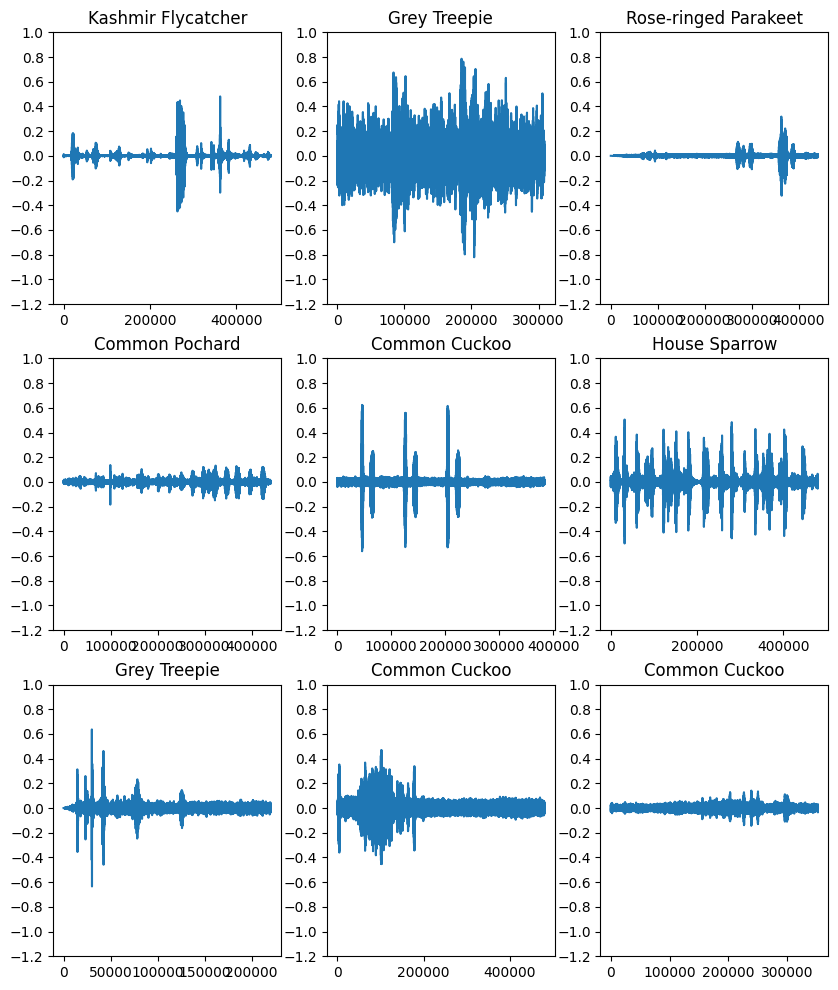

In [14]:
import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode("utf-8")
    ax.set_title(label)

plt.show()

In [15]:
#spectrogram_ds = waveform_ds.map(lambda x, y: (tf.signal.stft(x, frame_length=255, frame_step=128), y))

In [16]:
def get_spectrogram(waveform):
     # Zero-padding for an audio waveform with less than 16,000 samples.
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Cast the waveform tensors' dtype to float32.
    waveform = tf.cast(waveform, dtype=tf.float32)

    # Concatenate the waveform with `zero_padding`, which ensures all audio
    # clips are of the same length.
    waveform = tf.concat([waveform, zero_padding], 0)

    spectrogram = tf.signal.stft(waveform, frame_length=256, frame_step=128)

    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)

    # Add a `channels` dimension, so that the spectrogram can be used
    # as image-like input data with convolution layers (which expect
    # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]

    return spectrogram

In [21]:
from IPython import display

for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode("utf-8")
    spectrogram = get_spectrogram(waveform)

    print("Label:", label)
    print("Waveform shape:", waveform.shape)
    print("Spectrogram shape:", spectrogram.shape)
    print(spectrogram)


Label: Kashmir Flycatcher
Waveform shape: (480000,)
Spectrogram shape: (124, 129, 1)
tf.Tensor(
[[[2.53665028e-04]
  [4.77099420e-05]
  [9.33410833e-04]
  ...
  [9.20664825e-05]
  [2.67011492e-05]
  [5.79515472e-07]]

 [[2.61794776e-05]
  [1.55621994e-04]
  [3.11815500e-04]
  ...
  [5.91619100e-05]
  [9.16819772e-06]
  [7.04824924e-06]]

 [[3.26550798e-05]
  [8.25450115e-05]
  [1.16669697e-04]
  ...
  [1.53065223e-04]
  [1.43167621e-04]
  [8.25388124e-05]]

 ...

 [[1.09414861e-04]
  [6.00018320e-05]
  [1.18858494e-04]
  ...
  [7.42708216e-05]
  [8.26836258e-05]
  [1.91141327e-04]]

 [[3.35306395e-05]
  [7.57921298e-05]
  [1.78644223e-05]
  ...
  [1.06547719e-04]
  [7.31697128e-06]
  [8.17528926e-05]]

 [[5.24049392e-05]
  [1.77428265e-05]
  [5.48979006e-05]
  ...
  [5.72341742e-05]
  [5.28789678e-05]
  [3.89748020e-05]]], shape=(124, 129, 1), dtype=float32)


In [17]:
def get_spectrogram_and_label_id(audio, label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == birds)
    return spectrogram, label_id

In [18]:
spectrogram_ds = waveform_ds.map(
    map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
)

In [22]:
def plot_spectrogram(spectrogram, ax):
  print(np.size(spectrogram))

  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)

  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.

  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]

  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)

  print(X)

  print(X,Y,log_spec)

  ax.pcolormesh(X, Y, log_spec)


15996
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941  5071  5201  5332  5462  5592  5722  5852  5982  6112
  6242  6372  6502  6632  6762  6892  7022  7152  7282  7412  7542  7672
  7802  7932  8063  8193  8323  8453  8583  8713  8843  8973  9103  9233
  9363  9493  9623  9753  9883 10013 10143 10273 10403 10533 10664 10794
 10924 11054 11184 11314 11444 11574 11704 11834 11964 12094 12224 12354
 12484 12614 12744 12874 13004 13134 13264 13395 13525 13655 13785 13915
 14045 14175 14305 14435 14565 14695 14825 14955 15085 15215 15345 15475
 15605 15735 15865 15996]
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941 

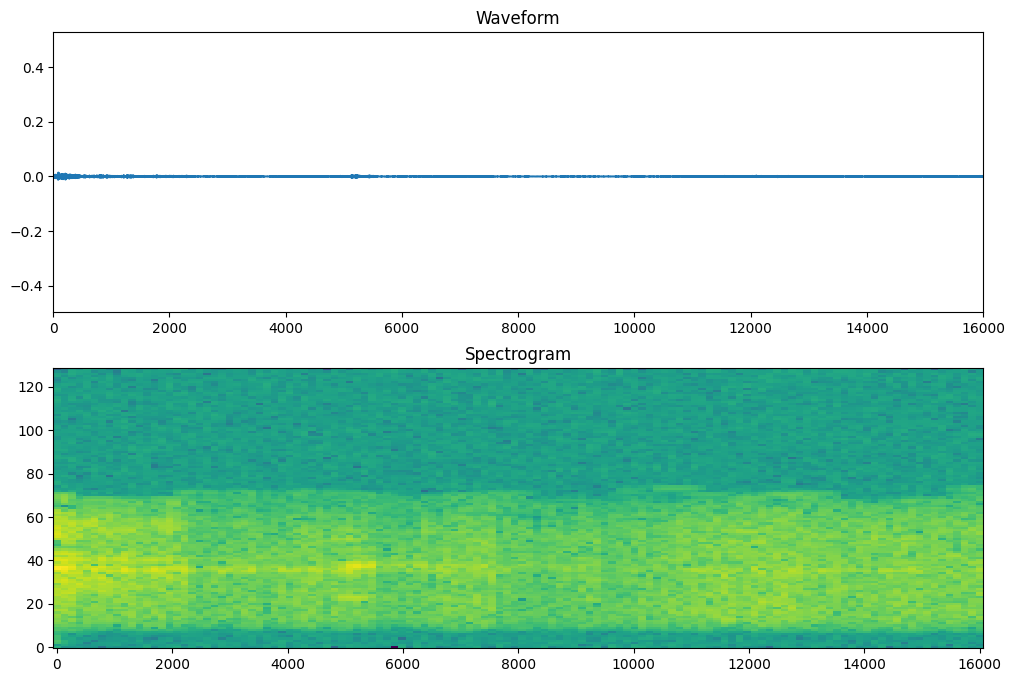

In [23]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title("Waveform")
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title("Spectrogram")
plt.show()

15996
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941  5071  5201  5332  5462  5592  5722  5852  5982  6112
  6242  6372  6502  6632  6762  6892  7022  7152  7282  7412  7542  7672
  7802  7932  8063  8193  8323  8453  8583  8713  8843  8973  9103  9233
  9363  9493  9623  9753  9883 10013 10143 10273 10403 10533 10664 10794
 10924 11054 11184 11314 11444 11574 11704 11834 11964 12094 12224 12354
 12484 12614 12744 12874 13004 13134 13264 13395 13525 13655 13785 13915
 14045 14175 14305 14435 14565 14695 14825 14955 15085 15215 15345 15475
 15605 15735 15865 15996]
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941 

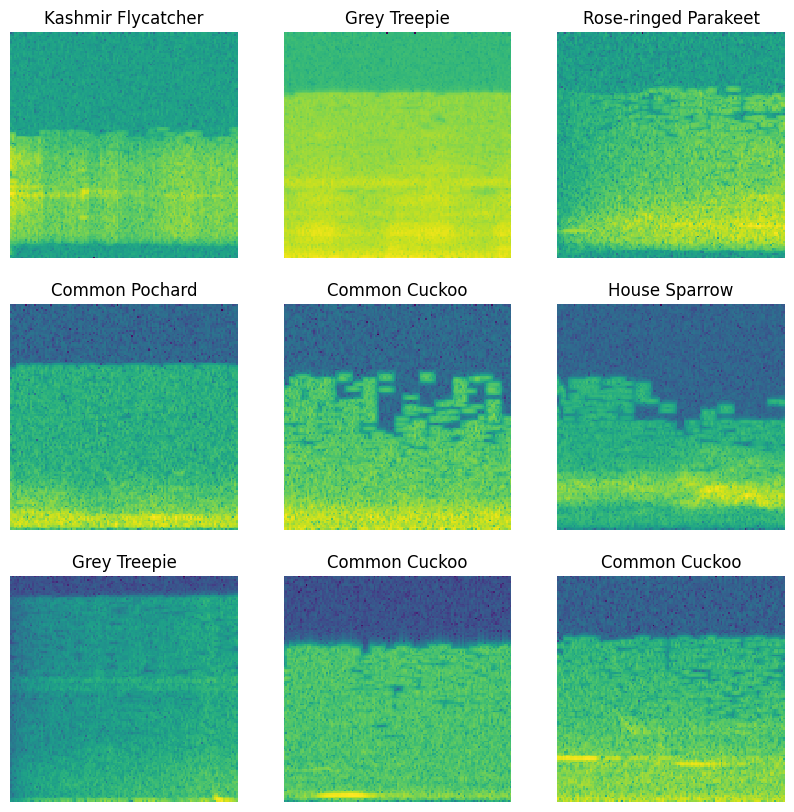

In [24]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(birds[label_id.numpy()])
    ax.axis("off")

plt.show()

In [29]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape

num_labels = len(birds)


In [30]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE
    )
    output_ds = output_ds.map(
        map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
    )

    return output_ds

In [31]:
train_ds    = spectrogram_ds
val_ds      = preprocess_dataset(valFileNames)
test_ds     = preprocess_dataset(testFileNames)

Tensor("strided_slice:0", shape=(), dtype=string)
shape: (None, None)
Tensor("strided_slice:0", shape=(), dtype=string)
shape: (None, None)


In [32]:
batch_size      = 64
train_ds        = train_ds.batch(batch_size)
val_ds          = val_ds.batch(batch_size)

In [33]:
train_ds        = train_ds.cache().prefetch(AUTOTUNE)
val_ds          = val_ds.cache().prefetch(AUTOTUNE)

In [34]:
from tensorflow import keras
from keras import layers
from keras import models

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential(
    [
        layers.Input(shape=input_shape),
        # Downsample the input.
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        # Plus de conv, + de max pulling, + de dense, + grabd nm
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_1 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

In [35]:
model.compile(
    optimizer           = tf.keras.optimizers.Adam(),
    loss                = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics             = ["accuracy"],
)

In [36]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data     = val_ds,
    epochs              = EPOCHS,
    callbacks           = tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10


82/82 [==============================] - 86s 980ms/step - loss: 3.3160 - accuracy: 0.0974 - val_loss: 3.0504 - val_accuracy: 0.1236
Epoch 2/10
82/82 [==============================] - 10s 123ms/step - loss: 3.0945 - accuracy: 0.1363 - val_loss: 2.9201 - val_accuracy: 0.1502
Epoch 3/10
82/82 [==============================] - 10s 121ms/step - loss: 2.9265 - accuracy: 0.1819 - val_loss: 2.8183 - val_accuracy: 0.2050
Epoch 4/10
82/82 [==============================] - 10s 119ms/step - loss: 2.8259 - accuracy: 0.2130 - val_loss: 2.7499 - val_accuracy: 0.2347
Epoch 5/10
82/82 [==============================] - 10s 116ms/step - loss: 2.7418 - accuracy: 0.2418 - val_loss: 2.6847 - val_accuracy: 0.2504
Epoch 6/10
82/82 [==============================] - 9s 111ms/step - loss: 2.6134 - accuracy: 0.2697 - val_loss: 2.5784 - val_accuracy: 0.2801
Epoch 7/10
82/82 [==============================] - 9s 115ms/step - loss: 2.5053 - accuracy: 0.2941 - val_loss: 2.5562 - val_accuracy: 0.2786

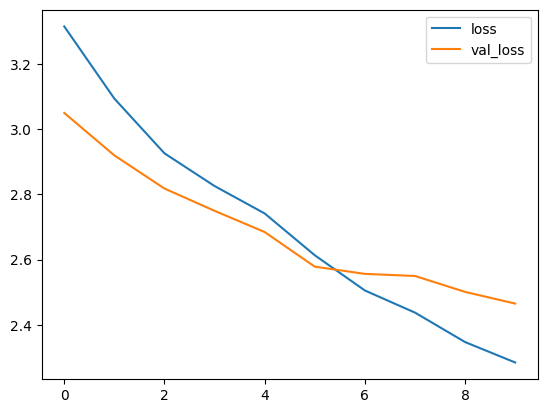

In [37]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

In [38]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [39]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f"Test set accuracy: {test_acc:.0%}")

22/22 [==============================] - 1s 19ms/step
Test set accuracy: 32%


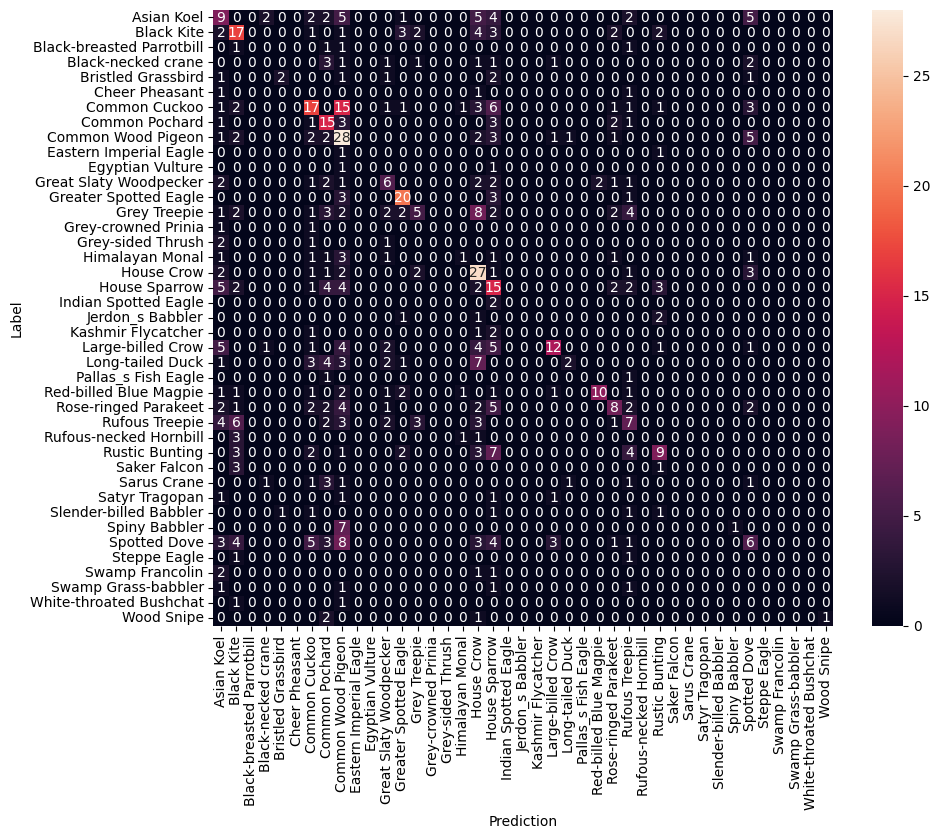

In [41]:
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=birds, yticklabels=birds, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()